## Imports

In [1]:
# libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import uniform
from scipy.stats import randint

# preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# pipelines
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline

# models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier ## XGBoost requires installation
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import StackingClassifier

# cross validation
from sklearn.model_selection import RandomizedSearchCV

# metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import root_mean_squared_error as rmse
from sklearn.model_selection import learning_curve


### Load the dataset

In [2]:
breast_can_cols = ['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']

breast_can_dtypes = {
    'id': np.int64,
    'diagnosis': str,
    'radius_mean': np.float64,
    'texture_mean': np.float64,
    'perimeter_mean': np.float64,
    'area_mean': np.float64,
    'smoothness_mean': np.float64,
    'compactness_mean': np.float64,
    'concavity_mean': np.float64,
    'concave points_mean': np.float64,
    'symmetry_mean': np.float64,
    'fractal_dimension_mean': np.float64,
    'radius_se': np.float64,
    'texture_se': np.float64,
    'perimeter_se': np.float64,
    'area_se': np.float64,
    'smoothness_se': np.float64,
    'compactness_se': np.float64,
    'concavity_se': np.float64 }

In [3]:
breast_can_data = pd.read_csv(r"breast_cancer_wisconsin_dataset_diag\wdbc.data", names=breast_can_cols, dtype=breast_can_dtypes)

df = breast_can_data

## Preprocessing

#### Getting Insights from Data

In [4]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

#### Separating the features and the target

In [6]:
targets = df['diagnosis']
features = df.drop('diagnosis', axis=1)

In [7]:
targets_df = pd.DataFrame(targets)
targets_df.head()

,diagnosis
0,M
1,M
2,M
3,M
4,M


#### Binarizing the target variable


In [8]:
## Malignant = 1 and Benign = 0
targets_df['diagnosis'] = targets_df['diagnosis'].map({'M': 1, 'B': 0})
targets_df.head()

,diagnosis
0,1
1,1
2,1
3,1
4,1


#### Getting the Correlations in the Data

In [9]:
corr_matrix = features.corr().abs()

np.fill_diagonal(corr_matrix.values, 0)
max_corr = corr_matrix.unstack().sort_values(ascending=False).drop_duplicates()
max_corr.head(15)
## Radius mean is seems to be highly correlated with some other features; so we can say the radius mean strongly represents those features.
## So we can drop the other features.

radius_mean      perimeter_mean     0.997855
radius_worst     perimeter_worst    0.993708
area_mean        radius_mean        0.987357
perimeter_mean   area_mean          0.986507
area_worst       radius_worst       0.984015
                 perimeter_worst    0.977578
radius_se        perimeter_se       0.972794
perimeter_worst  perimeter_mean     0.970387
radius_mean      radius_worst       0.969539
perimeter_mean   radius_worst       0.969476
radius_mean      perimeter_worst    0.965137
radius_worst     area_mean          0.962746
area_mean        area_worst         0.959213
perimeter_worst  area_mean          0.959120
radius_se        area_se            0.951830
dtype: float64

In [10]:
corr_radius_mean = features.corr()['radius_mean'].abs().sort_values(ascending=False)
high_corr_mean_radius = corr_radius_mean[corr_radius_mean>0.85]

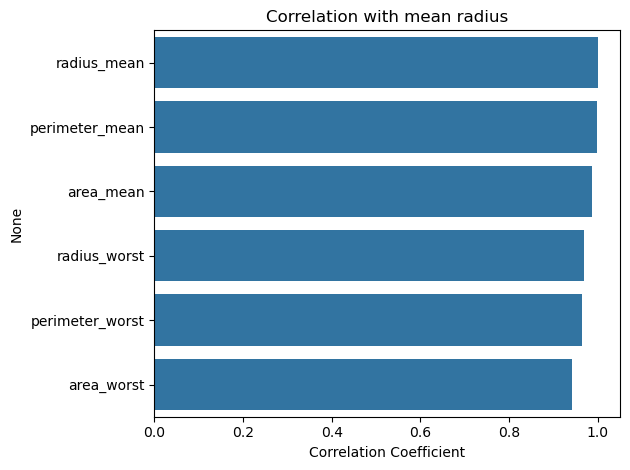

In [11]:
sns.barplot(x=high_corr_mean_radius.values, y=high_corr_mean_radius.index)
plt.title("Correlation with mean radius")
plt.xlabel("Correlation Coefficient")
plt.tight_layout()
plt.show()


#### Dropping the Correlated Features

In [12]:
## We won't permanently drop these correlated features from the main features dataset
## We can use these correlated features to the Tree based models
## Tree models are not sensitive to correlated features; in fact they works well

features_clean = features.drop(
    columns=[
    'perimeter_mean', 'perimeter_se', 
    'perimeter_worst', 'radius_worst', 
    'area_mean', 'area_worst', 'area_se' ## area_se is also corrrelated with radius_mean by 0.95 
    ])

## we dropped all the perimeter features because keeping redius and perimeter togather doesnt make sense


In [13]:
corr_matrix = features_clean.corr().abs()

np.fill_diagonal(corr_matrix.values, 0)
max_corr = corr_matrix.unstack().sort_values(ascending=False).drop_duplicates()
max_corr.head(15) ## Seems good

concavity_mean        concave points_mean        0.921391
texture_worst         texture_mean               0.912045
concave points_worst  concave points_mean        0.910155
concavity_worst       compactness_worst          0.892261
                      concavity_mean             0.884103
compactness_mean      concavity_mean             0.883121
compactness_worst     compactness_mean           0.865809
concave points_worst  concavity_mean             0.861323
concavity_worst       concave points_worst       0.855434
compactness_mean      concave points_mean        0.831135
radius_mean           concave points_mean        0.822529
compactness_mean      concavity_worst            0.816275
                      concave points_worst       0.815573
compactness_worst     fractal_dimension_worst    0.810455
smoothness_mean       smoothness_worst           0.805324
dtype: float64

In [14]:
features_clean.isna().sum()
## as there are no null values in the dataset, let's move on to the next step

id                         0
radius_mean                0
texture_mean               0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
texture_worst              0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

## Functions to calculate the accuracy of the models

#### Defining a Confusion Matrix function

In [15]:
# Defining a Confusion matrix function
def plot_confusion_matrix(cm, xticklabels:list, yticklabels:list, model_name: str):
    """
    This function prints and plots the confusion matrix.
    cm = confusion_matrix(y_test, y_pred)
    """
    import matplotlib.pyplot as plt
    import seaborn as sns
    
    print(f'{model_name} Confusion matrix')

    try:
        plt.figure(figsize=(4, 3))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels = xticklabels, 
        yticklabels = yticklabels
        )

        plt.title(f'{model_name} Confusion Matrix')
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.show()

    except Exception as e:
        print(f"Unexpected error occurred: {e}")
        print('\nRun again with the correct parameters.\n Parameters: cm (array-like), xticklabels (list), yticklabels (list), model_name (str)\n')
        

#### Defining a function to get the accuracy of the model using Confusion Matrix and Learning Curve

In [16]:
def create_clf_plots(model, X_train, X_val, y_train, y_val, model_name='Model', y_pred=None):
    """
    Create confusion matrix and learning curve plots for breast cancer classifier
    Parameters:
    - model: Trained classifier model
    - X_train, X_val: Training and validation data
    - y_train, y_val: Training and validation labels
    - model_name (optional): Name of the model (default: None)
    - y_pred (optional): Predicted labels for validation data (if available)

    Returns:
    - fig: Matplotlib figure object containing the plots
    """
    if y_pred is None:
        y_pred = model.predict(X_val)
    
    # Create subplots
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))
    fig.suptitle(f'{model_name} Classification Results', fontsize=16, fontweight='bold')
    
    # 1. Confusion Matrix
    cm = confusion_matrix(y_val, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[0])
    axes[0].set_title('Confusion Matrix')
    axes[0].set_xlabel('Predicted')
    axes[0].set_ylabel('Actual')
    axes[0].set_xticklabels(['Benign', 'Malignant'])
    axes[0].set_yticklabels(['Benign', 'Malignant'])
    
    # 2. Learning Curve
    train_sizes, train_scores, val_scores = learning_curve(
        model, X_train, y_train, cv=5, n_jobs=-1, 
        train_sizes=np.linspace(0.1, 1.0, 10))
    
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    val_mean = np.mean(val_scores, axis=1)
    val_std = np.std(val_scores, axis=1)
    
    axes[1].plot(train_sizes, train_mean, 'o-', color='blue', label='Training Score')
    axes[1].fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color='blue')
    axes[1].plot(train_sizes, val_mean, 'o-', color='red', label='Validation Score')
    axes[1].fill_between(train_sizes, val_mean - val_std, val_mean + val_std, alpha=0.1, color='red')
    axes[1].set_xlabel('Training Set Size')
    axes[1].set_ylabel('Accuracy Score')
    axes[1].set_title('Learning Curve')
    axes[1].legend(loc='best')
    axes[1].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # # Print classification report: 
    print("Classification Report:")
    print("=" * 50)
    print(classification_report(y_val, y_pred, target_names=['Benign', 'Malignant']))


## Splitting the Training and Test Set

In [17]:
features_clean.shape

(569, 24)

In [18]:
## We will use the 10% of the data as the test set
X_train, X_test, y_train, y_test = train_test_split(features_clean, targets_df, test_size=0.1, random_state=42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((512, 24), (512, 1), (57, 24), (57, 1))

In [19]:
## We will use the 10% of the training data as the validation set
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)
X_train.shape, y_train.shape, y_val.shape, X_val.shape,

((460, 24), (460, 1), (52, 1), (52, 24))

## Training the Classifier Models

In [20]:
y_train = np.array(y_train).ravel()

### Using Linear Models

#### **Logistic Regression**

##### Performing Cross Validation for Logistic Regression

In [21]:
param_distributions = {
    'penalty': ['l1', 'l2'],
    # 'C': np.logspace(-1, -1, 100), # using logspace
    'C': np.linspace(0.01, 1, 40), # using linspace
    'solver': ['liblinear', 'saga']
}

logreg_clf_cv = RandomizedSearchCV(
    LogisticRegression(), 
    param_distributions=param_distributions, cv=5, n_jobs=-1, 
    n_iter=40, random_state=42
    )

logreg_clf_cv.fit(X_train, y_train)
print("Best hyperparameters:", logreg_clf_cv.best_params_)
print("Best cross-validation score:", logreg_clf_cv.best_score_)

Best hyperparameters: {'solver': 'liblinear', 'penalty': 'l1', 'C': np.float64(0.6446153846153846)}
Best cross-validation score: 0.9608695652173914


##### Fitting Logistic Regression to the Training set

In [22]:
logreg_clf = make_pipeline(StandardScaler(), LogisticRegression(C=0.1, solver='liblinear', penalty='l1', random_state=42))
logreg_clf.fit(X_train, y_train)
logreg_clf.score(X_val, y_val) ## 0.961038961038961

0.9423076923076923

##### Using Confusion Matrix and Learning Curve to evaluate the Logistic Regression Model

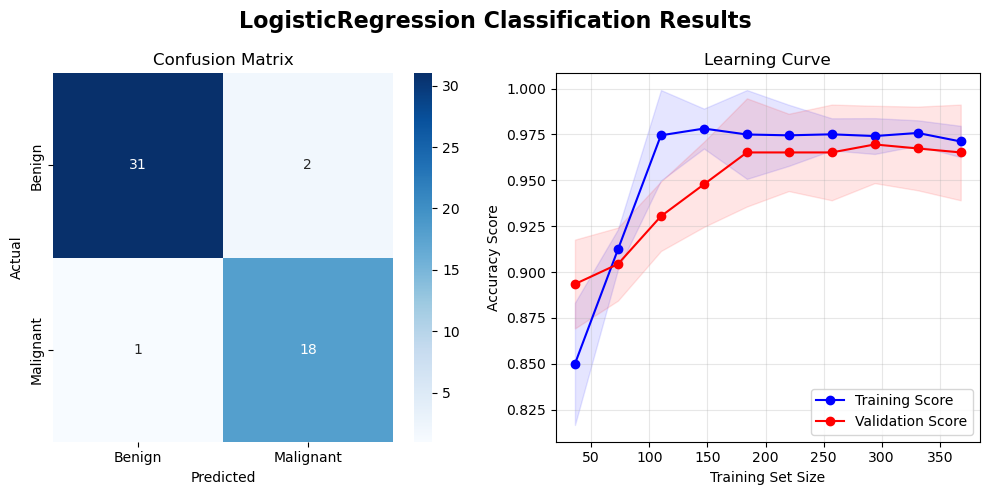

Classification Report:
              precision    recall  f1-score   support

      Benign       0.97      0.94      0.95        33
   Malignant       0.90      0.95      0.92        19

    accuracy                           0.94        52
   macro avg       0.93      0.94      0.94        52
weighted avg       0.94      0.94      0.94        52



In [23]:
create_clf_plots(logreg_clf, X_train, X_val, y_train, y_val, model_name='LogisticRegression', y_pred=None)

#### Support Vector Classifier

##### Performing Cross Validation for Support Vector Machine Classifier

In [24]:
from scipy.stats import loguniform
param_grid = {
    'C': loguniform(1e-2, 1e3),
    'gamma': loguniform(1e-4, 1e-1),
    'kernel': ['rbf']
}
svc_cv = RandomizedSearchCV(SVC(), param_distributions=param_grid, cv=5, n_iter=10, random_state=42, n_jobs=-1)
svc_cv.fit(X_train, y_train)
svc_cv.best_params_

### Output:
## 'C': np.float64(10.129197956845726),
## 'gamma': np.float64(0.013311216080736894),
## 'kernel': 'rbf'

{'C': np.float64(10.129197956845726),
 'gamma': np.float64(0.013311216080736894),
 'kernel': 'rbf'}

##### Fitting SVC to the Training set

In [25]:
svc = make_pipeline(StandardScaler(), SVC(gamma=0.01, C=1, kernel='rbf'))

svc.fit(X_train, y_train)

print(f"SVC Training Score = {svc.score(X_train, y_train)}")
print(f"SVC Validation Score = {svc.score(X_val, y_val)}")

SVC Training Score = 0.9760869565217392
SVC Validation Score = 0.9807692307692307


##### Using Confusion Matrix and Learning Curve to Evaluate the SVC Model

Validation Accuracy: 98.08%


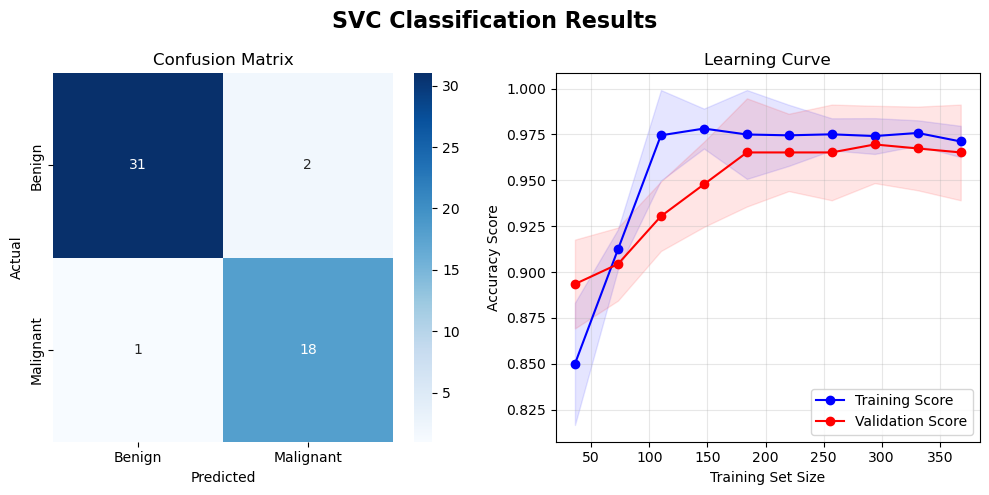

Classification Report:
              precision    recall  f1-score   support

      Benign       0.97      0.94      0.95        33
   Malignant       0.90      0.95      0.92        19

    accuracy                           0.94        52
   macro avg       0.93      0.94      0.94        52
weighted avg       0.94      0.94      0.94        52



In [26]:
# # Make predictions
# y_pred = svc.predict(X_val)

# # Create confusion matrix
# cm = confusion_matrix(y_val, y_pred)
# plot_confusion_matrix(cm, xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'], model_name='SVC') ## This only shows the confusion matrix

# Confusion Matrix, Learning Curve and Classification Report
print(f"Validation Accuracy: {svc.score(X_val, y_val)*100:.2f}%")

create_clf_plots(logreg_clf, X_train, X_val, y_train, y_val, model_name='SVC', y_pred=None)

### Creating fresh train and test sets for Tree Based Classifiers

In [27]:
X_train_mod, X_test_mod, y_train_mod, y_test_mod, X_val_mod, y_val_mod = X_train, X_test, y_train, y_test, X_val, y_val 

## saved the previous training, validation and test sets as _mod
## as we modified those by dropping all the highly correlated features

In [28]:
## Before moving forward to Tree based classsifiers, we'll retrive the dropped columns
## Tree based classifiers are not affected by correlation between features

## We'll use the features dataframe; which is the original dataframe with the correlated columns
## Freshly split the dataset into training and testing sets again

X_train, X_test, y_train, y_test = train_test_split(features, targets_df, test_size=0.1, random_state=42) # 10% test size

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42) # 10% validation size

In [29]:
y_train, y_val, y_test = np.array(y_train).ravel(),np.array(y_val).ravel(), np.array(y_test).ravel()

### Decision Tree Classifier

##### Performing Cross Validation for Decision Tree Classifier

In [30]:
param_dist = {
    'max_depth': [3, 5, 7, 9, 11],
    'min_samples_split': [2, 3, 4, 5],
    'min_samples_leaf': [1, 2, 3],
    'max_features': ['sqrt', 'log2', None]
}
tree_clf_cv = RandomizedSearchCV(DecisionTreeClassifier(), param_distributions=param_dist, n_iter=10, cv=5, random_state=42)
tree_clf_cv.fit(X_train, y_train)
print("Best hyperparameters:", tree_clf_cv.best_params_)
print("Best score:", tree_clf_cv.best_score_)

Best hyperparameters: {'min_samples_split': 4, 'min_samples_leaf': 3, 'max_features': 'sqrt', 'max_depth': 9}
Best score: 0.941304347826087


##### Fitting Decision Tree Classifier to the Training set

In [31]:
tree_clf = make_pipeline(StandardScaler(), DecisionTreeClassifier(min_samples_leaf=3, min_samples_split=3, max_depth=11, max_features='sqrt', random_state=42))
tree_clf.fit(X_train, y_train)
tree_clf.score(X_val, y_val)

0.9423076923076923

##### Using Confusion Matrix and Learning Curve to Evaluate the Decision Tree Model

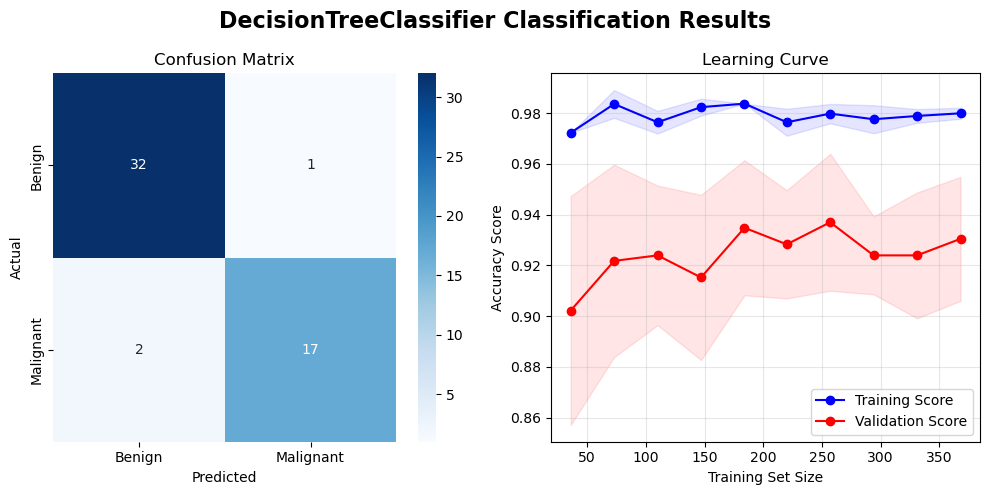

Classification Report:
              precision    recall  f1-score   support

      Benign       0.94      0.97      0.96        33
   Malignant       0.94      0.89      0.92        19

    accuracy                           0.94        52
   macro avg       0.94      0.93      0.94        52
weighted avg       0.94      0.94      0.94        52



In [32]:
# tree_pred =  tree_clf.predict(X_val)
# cm = confusion_matrix(y_val, tree_pred)
# plot_confusion_matrix(cm, xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'], model_name='Decision Tree') ## only shows confusion matrix

# Confusion Matrix, Learning Curve and Classification Report
create_clf_plots(tree_clf, X_train, X_val, y_train, y_val, 'DecisionTreeClassifier', y_pred=None)

## Using Ensemble Methods

### Random Forest Classifier

#### Performing Cross Validation for Random Forest Classifier

In [33]:
param_dist = {
    # Number of trees - focus on sweet spot range
    'n_estimators': [100, 200, 300, 500],
    
    # Tree depth - prevent overfitting while allowing complexity
    'max_depth': [3, 5, 7, 10, 15, 20, None],
    
    # Sampling parameters - focus on effective ranges
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4, 8],
    
    # Feature selection - all good options
    'max_features': ['sqrt', 'log2', 0.3, 0.5],
    
    # Bootstrap sampling - useful for variance reduction
    'max_samples': [0.7, 0.8, 0.9, 1.0],
    
    # Regularization - focus on lower values that actually matter
    'min_impurity_decrease': [0.0, 0.001, 0.01, 0.05],
    
    # Class balancing (useful for imbalanced datasets)
    'class_weight': [None, 'balanced', 'balanced_subsample']
}

# Use more iterations for better exploration
rf_cv = RandomizedSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_distributions=param_dist,
    cv=5,
    n_iter=50,  # Increased from 10
    scoring='roc_auc',  # Better metric for binary classification
    verbose=2,
    random_state=42,
    n_jobs=-1)

rf_cv.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'class_weight': [None, 'balanced',
                                                         'balanced_subsample'],
                                        'max_depth': [3, 5, 7, 10, 15, 20,
                                                      None],
                                        'max_features': ['sqrt', 'log2', 0.3,
                                                         0.5],
                                        'max_samples': [0.7, 0.8, 0.9, 1.0],
                                        'min_impurity_decrease': [0.0, 0.001,
                                                                  0.01, 0.05],
                                        'min_samples_leaf': [1, 2, 4, 8],
                                        'min_samples_split': [2, 5, 10, 20],
                                        'n_estimators': [100, 200, 300, 500]},
                   random_state=42, scoring='roc_auc', verbose=2)

In [34]:
## Best Parameters to fit Random Forest Clf into the training set are:

#  {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 2, 'min_impurity_decrease': 0.0, 'max_samples': 0.7, 'max_features': 0.5, 'max_depth': 15, 'class_weight': 'balanced_subsample'}

rf_clf = make_pipeline(
    StandardScaler(), 
    RandomForestClassifier(
        n_estimators= 100, min_samples_split= 5, max_samples= 0.7, max_depth=15, 
        min_samples_leaf= 2, min_impurity_decrease=0.0, max_features= 0.5,
        class_weight='balanced_subsample',
        random_state=42
        )
)
rf_clf.fit(X_train, y_train)
y_pred = rf_clf.predict(X_val)
print(f'Random Forest Train Score = {rf_clf.score(X_train, y_train)}')
print(f'Random Forest Validation Score = {rf_clf.score(X_val, y_val)}')

## Random Forest Train Score = 0.9912280701754386
## Random Forest Validation Score = 0.9649122807017544

## Using the best parameters, RF does fit the data very well that it overfit :/

Random Forest Train Score = 0.9934782608695653
Random Forest Validation Score = 0.9615384615384616


#### Tweaking the hyperparameters of Random Forest Classifier

In [35]:
## Try tweaking the hyperparameters to improve the model's bias-variance tradeoff.

rf_clf_optimal = make_pipeline(
    StandardScaler(), 
    RandomForestClassifier(
        n_estimators= 100, min_samples_split= 10, max_samples= 0.1, 
        max_depth=5, min_samples_leaf= 5, 
        n_jobs=-1, random_state=42
        )
)
rf_clf_optimal.fit(X_train, y_train)
y_pred = rf_clf_optimal.predict(X_val)
print(f'Random Forest Train Score = {rf_clf_optimal.score(X_train, y_train)}')
print(f'Random Forest Validation Score = {rf_clf_optimal.score(X_val, y_val)}')



Random Forest Train Score = 0.9347826086956522
Random Forest Validation Score = 0.9423076923076923


#### Using Confusion Matrix and Learning Curve to Evaluate the Random Forest Classifier

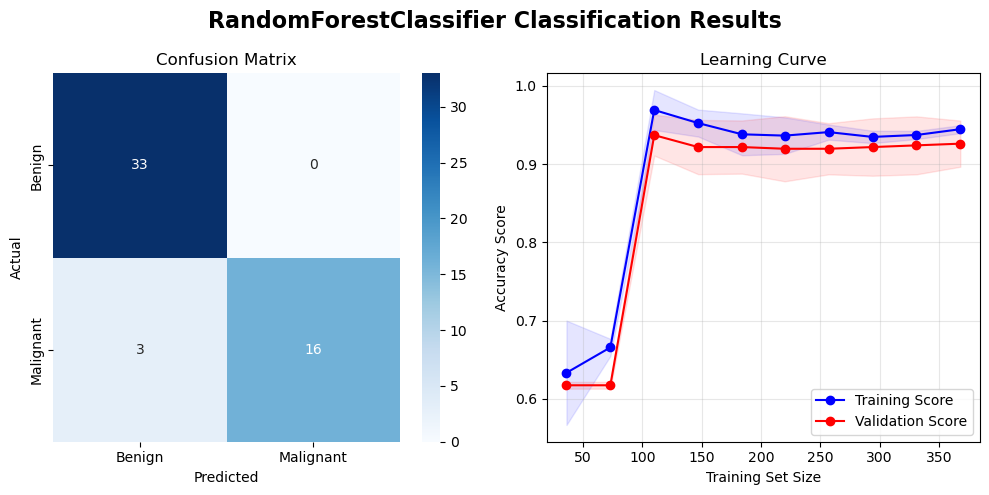

Classification Report:
              precision    recall  f1-score   support

      Benign       0.92      1.00      0.96        33
   Malignant       1.00      0.84      0.91        19

    accuracy                           0.94        52
   macro avg       0.96      0.92      0.94        52
weighted avg       0.95      0.94      0.94        52



In [36]:
# Confusion Matrix, Learning Curve and Classification Report
create_clf_plots(rf_clf_optimal, X_train, X_val, y_train, y_val, 'RandomForestClassifier', y_pred=None)

### XGBoost Classifier

#### Fitting XGBoost Classifier to the Training set

In [37]:
# xgb_clf = XGBClassifier(**xgb_cv.best_params_) ## unpack the best parameter

xgb_clf = XGBClassifier(learning_rate=0.1, max_depth=10, gamma=70, n_estimators=200)
xgb_clf.fit(X_train, y_train)
xgb_clf.score(X_train, y_train), xgb_clf.score(X_val, y_val)

(0.941304347826087, 0.9423076923076923)

#### Using Confusion Matrix and Learning Curve to Evaluate the XGBoost Classifier Model

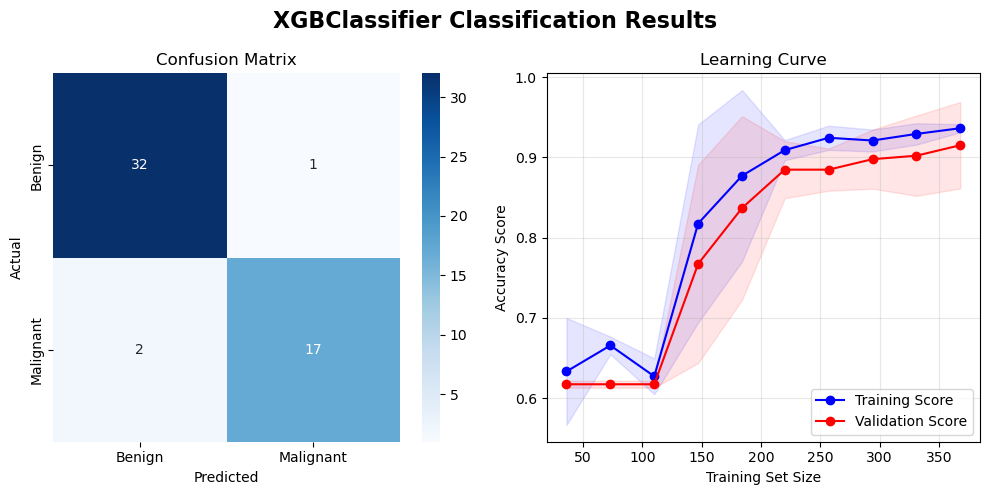

Classification Report:
              precision    recall  f1-score   support

      Benign       0.94      0.97      0.96        33
   Malignant       0.94      0.89      0.92        19

    accuracy                           0.94        52
   macro avg       0.94      0.93      0.94        52
weighted avg       0.94      0.94      0.94        52



In [38]:
# Confusion Matrix, Learning Curve and Classification Report

create_clf_plots(xgb_clf, X_train, X_val, y_train, y_val, 'XGBClassifier', y_pred=None) ## it's overfitting

### Voting Classifier

In [39]:
vote_estimator = [
    ('lr_mod', logreg_clf),
    ('svc', svc),
    # ('rf', rf_clf_optimal), ## random forest is not performing well; Val Score = 0.96
    ('xgb', xgb_clf)
    ]

vote_clf = VotingClassifier(estimators=vote_estimator, n_jobs=-1)

vote_clf.fit(X_train, y_train)

print('Vote Clf Training score: ', vote_clf.score(X_train, y_train))
print('Vote Clf Validation score: ', vote_clf.score(X_val, y_val))

Vote Clf Training score:  0.9760869565217392
Vote Clf Validation score:  0.9807692307692307


### Comparing all the models   

##### Logistic Regression Model Training and Validation Set Comparison

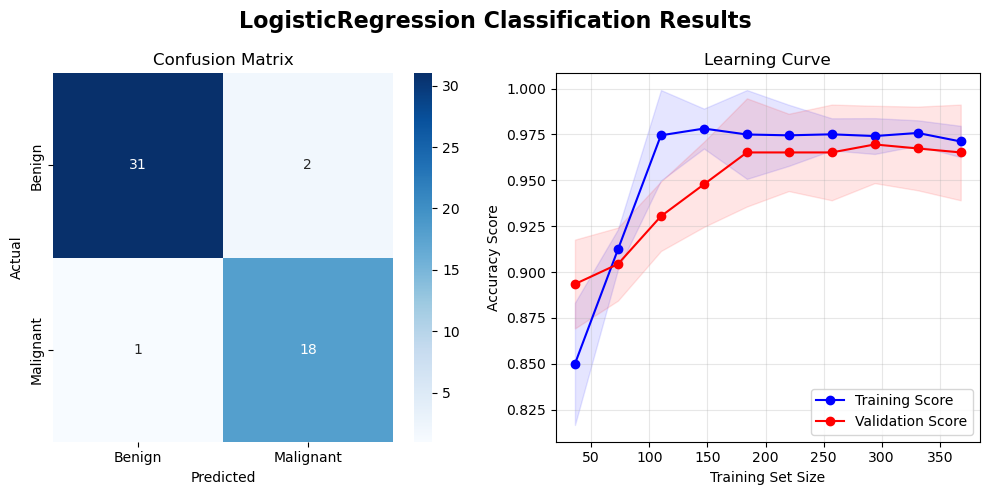

Classification Report:
              precision    recall  f1-score   support

      Benign       0.97      0.94      0.95        33
   Malignant       0.90      0.95      0.92        19

    accuracy                           0.94        52
   macro avg       0.93      0.94      0.94        52
weighted avg       0.94      0.94      0.94        52



In [40]:
create_clf_plots(logreg_clf, X_train_mod, X_val_mod, y_train_mod, y_val_mod, model_name='LogisticRegression', y_pred=None)

##### SVC Model Training and Validation Set Comparison

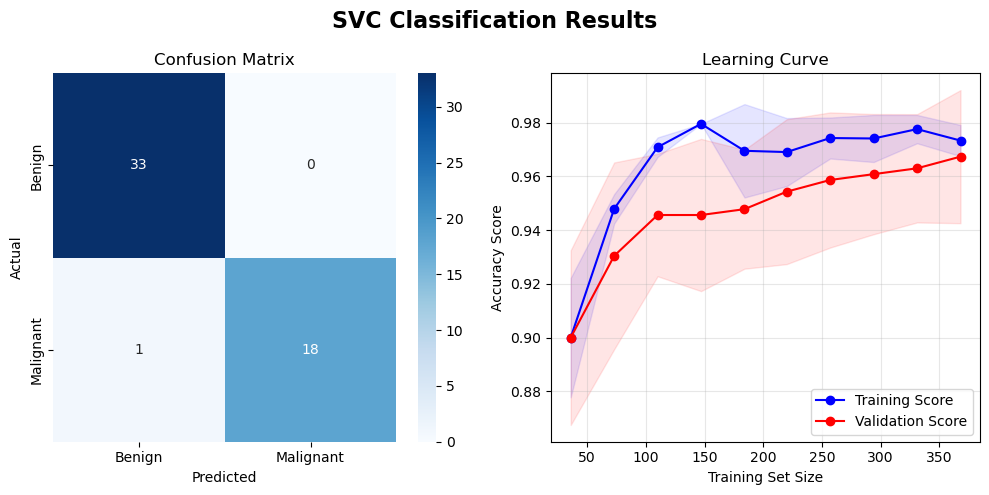

Classification Report:
              precision    recall  f1-score   support

      Benign       0.97      1.00      0.99        33
   Malignant       1.00      0.95      0.97        19

    accuracy                           0.98        52
   macro avg       0.99      0.97      0.98        52
weighted avg       0.98      0.98      0.98        52



In [41]:
create_clf_plots(svc, X_train_mod, X_val_mod, y_train_mod, y_val_mod, 'SVC',y_pred=None)

##### Decision Tree Model Training and Validation Set Comparison

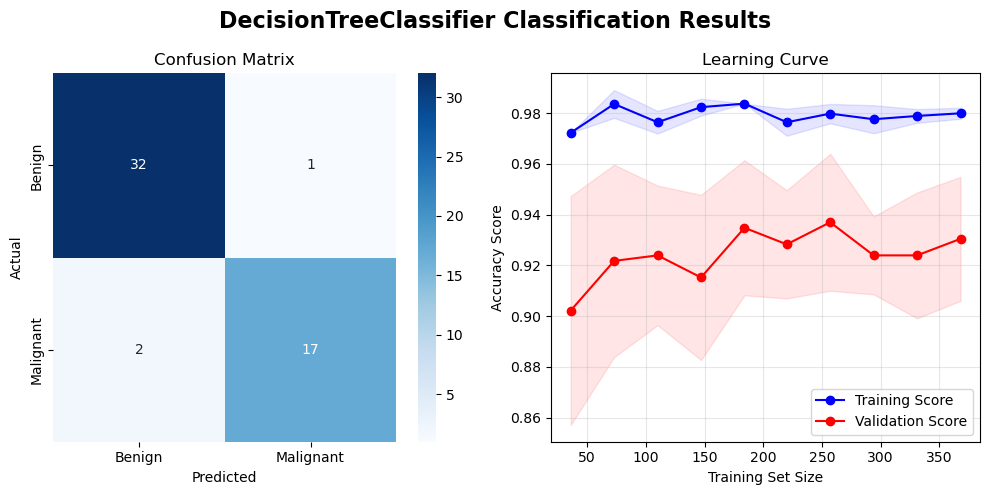

Classification Report:
              precision    recall  f1-score   support

      Benign       0.94      0.97      0.96        33
   Malignant       0.94      0.89      0.92        19

    accuracy                           0.94        52
   macro avg       0.94      0.93      0.94        52
weighted avg       0.94      0.94      0.94        52



In [42]:
create_clf_plots(tree_clf, X_train, X_val, y_train, y_val, 'DecisionTreeClassifier', 
y_pred=None)

##### Random Forest Classifier Model Training and Validation Set Comparison

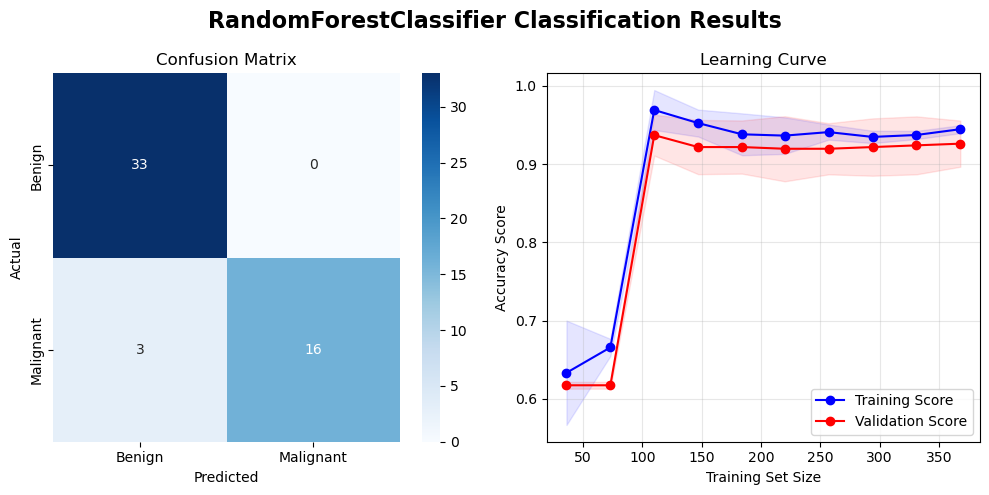

Classification Report:
              precision    recall  f1-score   support

      Benign       0.92      1.00      0.96        33
   Malignant       1.00      0.84      0.91        19

    accuracy                           0.94        52
   macro avg       0.96      0.92      0.94        52
weighted avg       0.95      0.94      0.94        52



In [43]:
create_clf_plots(rf_clf_optimal, X_train, X_val, y_train, y_val, 'RandomForestClassifier', y_pred=None)

##### XGB Classifier Model Training and Validation Set Comparison

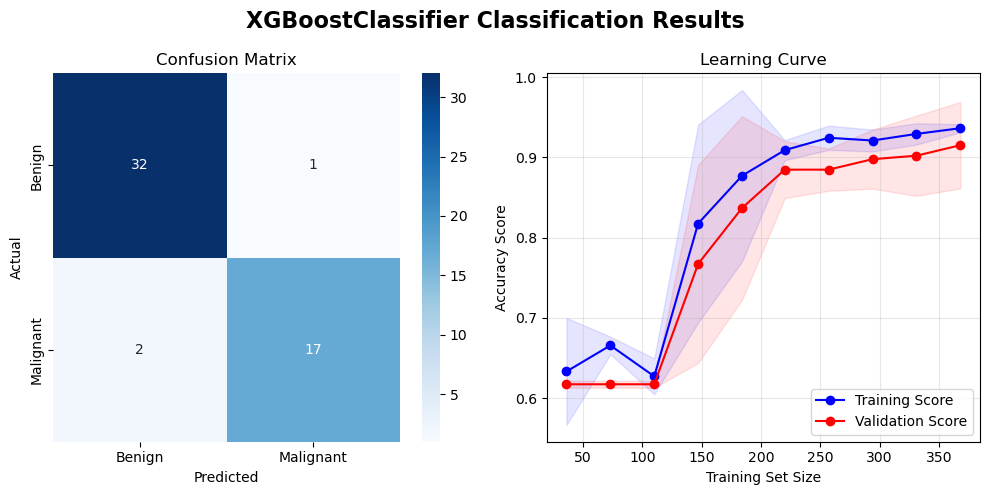

Classification Report:
              precision    recall  f1-score   support

      Benign       0.94      0.97      0.96        33
   Malignant       0.94      0.89      0.92        19

    accuracy                           0.94        52
   macro avg       0.94      0.93      0.94        52
weighted avg       0.94      0.94      0.94        52



In [44]:
create_clf_plots(xgb_clf, X_train, X_val, y_train, y_val, 'XGBoostClassifier', y_pred=None)

##### Voting Classifier Model Training and Validation Set Comparison

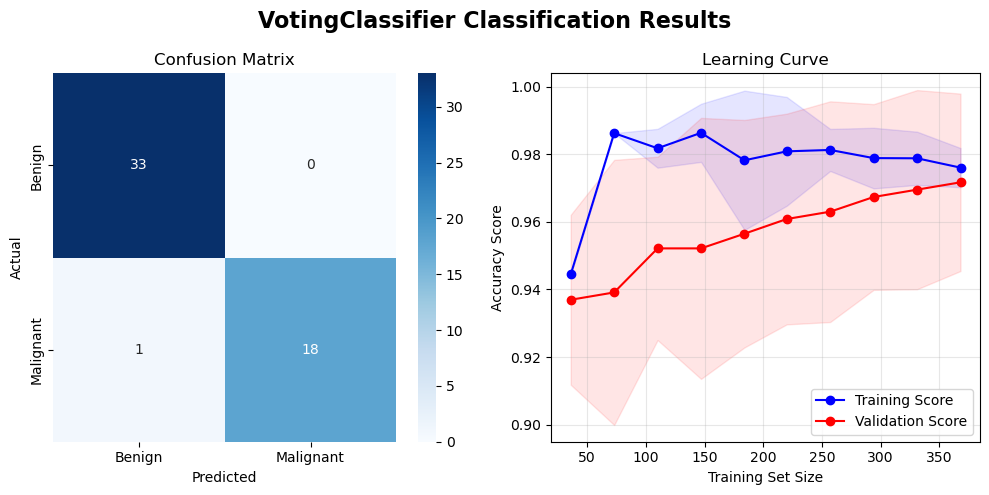

Classification Report:
              precision    recall  f1-score   support

      Benign       0.97      1.00      0.99        33
   Malignant       1.00      0.95      0.97        19

    accuracy                           0.98        52
   macro avg       0.99      0.97      0.98        52
weighted avg       0.98      0.98      0.98        52



In [45]:
create_clf_plots(vote_clf, X_train, X_val, y_train, y_val, 'VotingClassifier', y_pred=None)

## Using Multilayer Stacking Ensemble for the Best Performance

In [46]:
stack_estimators = [
    ('lr', logreg_clf),
    ('svc', svc),
    ('rf', rf_clf_optimal),
    ('xgb', xgb_clf) 
    ]
## We reject DecisionTreeClassifier Model as it's not performing well
## We reject VotinggClassifier as it's overfitting the data
## We are using RandomForestClassifier; soj using DecisionTree doesn't make sense


#### stack_clf_lr (Logistic Regression)

In [47]:
stack_clf_lr = StackingClassifier(
    
    estimators=stack_estimators, 

    final_estimator=LogisticRegression(random_state=40),
    # ## Train Score = 0.991 | Validation Score = 0.981

    # final_estimator=SVC(random_state=41), 
    # ## Train Score = 0.993 | Validation Score = 0.981

    # final_estimator=RandomForestClassifier(random_state=41), 
    # ## Train Score = 0.989 | Validation Score = 0.962

    # final_estimator=XGBClassifier(),
    ## Train Score = 0.991 | Validation Score = 0.981,
    )

stack_clf_lr.fit(X_train_mod, y_train_mod)
print(f'Train Score = {stack_clf_lr.score(X_train_mod, y_train_mod):.5f} | ', end='')
print(f'Validation Score = {stack_clf_lr.score(X_val_mod, y_val_mod):.5f}')

Train Score = 0.98261 | Validation Score = 0.98077


#### stack_clf_svc (SVC)

In [48]:
stack_clf_svc = StackingClassifier(
    
    estimators=stack_estimators, 

    # final_estimator=LogisticRegression(random_state=40),
    # ## Train Score = 0.991 | Validation Score = 0.981

    final_estimator=SVC(random_state=40), 
    # ## Train Score = 0.993 | Validation Score = 0.981

    # final_estimator=RandomForestClassifier(random_state=40), 
    # ## Train Score = 0.989 | Validation Score = 0.962

    # final_estimator=XGBClassifier(),
    ## Train Score = 0.991 | Validation Score = 0.981,
    )

stack_clf_svc.fit(X_train_mod, y_train_mod)
print(f'Train Score = {stack_clf_svc.score(X_train_mod, y_train_mod):.5f} | ', end='')
print(f'Validation Score = {stack_clf_svc.score(X_val_mod, y_val_mod):.5f}')

Train Score = 0.98043 | Validation Score = 0.98077


#### stack_clf_rf (Random Forest)

In [49]:
stack_clf_rf = StackingClassifier(
    
    estimators=stack_estimators, 

    # final_estimator=LogisticRegression(random_state=43),
    # ## Train Score = 0.983 | Validation Score = 0.981

    # final_estimator=SVC(random_state=43), 
    # ## Train Score = 0.993 | Validation Score = 0.981

    final_estimator=RandomForestClassifier(random_state=43), 
    # ## Train Score = 0.983 | Validation Score = 0.981

    # final_estimator=XGBClassifier(),
    # ## Train Score = 0.991 | Validation Score = 0.981
    )

stack_clf_rf.fit(X_train, y_train)
print(f'Train Score = {stack_clf_rf.score(X_train, y_train):.5f} | ', end='')
print(f'Validation Score = {stack_clf_rf.score(X_val, y_val):.5f}')

Train Score = 0.98478 | Validation Score = 0.96154


#### stack_clf_xgb (XGBoost Classifier)

In [50]:
stack_clf_xgb = StackingClassifier(
    
    estimators=stack_estimators, 

    # final_estimator=LogisticRegression(random_state=43),
    # ## Train Score = 0.983 | Validation Score = 0.981

    # final_estimator=SVC(random_state=43), 
    # ## Train Score = 0.993 | Validation Score = 0.981

    # final_estimator=RandomForestClassifier(random_state=43),), 
    # ## Train Score = 0.983 | Validation Score = 0.981

    final_estimator=XGBClassifier(),
    ## Train Score = 0.991 | Validation Score = 0.981
    )

stack_clf_xgb.fit(X_train, y_train)
print(f'Train Score = {stack_clf_xgb.score(X_train, y_train):.5f} | ', end='')
print(f'Validation Score = {stack_clf_xgb.score(X_val, y_val):.5f}')

Train Score = 0.99130 | Validation Score = 0.98077


#### stack_clf_multilayer (Multilayer stacking estimator)

In [51]:
multi_stack_estimators=[
    ('stack_clf_lr', stack_clf_lr),
    ('stack_clf_svc', stack_clf_svc),
    ('stack_clf_rf', stack_clf_rf),
    ('stack_clf_xgb', stack_clf_xgb)
]

stack_clf_multilayer = StackingClassifier(
    estimators=multi_stack_estimators,
    final_estimator=LogisticRegression(random_state=44)
    # final_estimator=RandomForestClassifier(random_state=44),
    # final_estimator=SVC(random_state=44),
    # final_estimator=XGBClassifier(),
)
stack_clf_multilayer.fit(X_train, y_train)

# print(f"Stack_lr: {stack_clf_lr.score(X_val_mod, y_val_mod):.5f}")
# print(f"Stack_svc: {stack_clf_svc.score(X_val_mod, y_val_mod):.5f}")
# print(f"Stack_rf: {stack_clf_rf.score(X_val, y_val):.5f}")
# print(f"Stack_xgb: {stack_clf_xgb.score(X_val, y_val):.5f}")
# print("-------------------------------------------------\n")

print(f"Multilayer stacking classifier score: {stack_clf_multilayer.score(X_train, y_train):.5f}")
print(f"Multilayer stacking classifier score: {stack_clf_multilayer.score(X_val, y_val):.5f}")


Multilayer stacking classifier score: 0.98261
Multilayer stacking classifier score: 0.98077


### Choosing the final_estimator hyperparameter

We got the same outputs by tweaking `final_estimator` hyperparameters
We'll finalize the **Multilayer Stacking Classifier** as the final model

|Stack Models | Score|
|---|---|
|Stack_lr| 0.98077|
|Stack_svc| 0.98077|
|Stack_rf| 0.96154|
|Stack_xgb| 0.98077|

**Tweaking final_estimator hyperparameters**

Final_estimators|Training score| Validation score|
|---|---|---|
|XGB Classifier| 0.98261| 0.98077|
|SVC| 0.98261| 0.98077|
|Random Forest Classifier| 0.98261| 0.98077|
|Logistic Regression| 0.98261| 0.98077|

All the `final_estimators` are performing equally well.
So, we will choose `Logistic Regression` as our final estimator; as it's fast and simpliest

## Predicting the Test set with the final model

In [52]:
y_pred = stack_clf_multilayer.predict(X_test)

print(f'Test Score = {stack_clf_multilayer.score(X_test, y_test)}')
## We got 94.73% accuracy on the test set

print(f'Test RMSE = {rmse(y_pred, y_test)}')
## We got 0.229 RMSE on the test set; signifing a very good fit

Test Score = 0.9473684210526315
Test RMSE = 0.22941573387056177


Final Model Confusion matrix


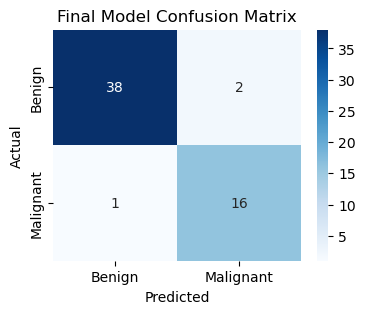

In [53]:
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(
    cm, 
    xticklabels = ['Benign', 'Malignant'], 
    yticklabels=['Benign', 'Malignant'], 
    model_name="Final Model"
    )

In [54]:
y_pred = pd.DataFrame(y_pred, columns=['Predicted'])
y_pred['Predicted'] = y_pred['Predicted'].map({1: 'M', 0: 'B'})
y_pred.head()

,Predicted
0,B
1,M
2,M
3,B
4,B


In [55]:
y_test = pd.DataFrame(y_test, columns=['Actual Diagnosis'])
y_test['Actual Diagnosis'] = y_test['Actual Diagnosis'].map({1: 'M', 0: 'B'})
y_test.head()

,Actual Diagnosis
0,B
1,M
2,M
3,B
4,B


### Prediction DataFrame

In [56]:
pred_df = pd.concat([y_test, y_pred], axis=1)
pred_df.head(10)

,Actual Diagnosis,Predicted
0,B,B
1,M,M
2,M,M
3,B,B
4,B,B
5,M,M
6,M,M
7,M,M
8,B,M
9,B,B
